In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Smartphones_cleaned_dataset.csv')

print(df.shape)

(980, 26)


In [30]:
(df.head(10))


,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412
5,samsung,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,True,True,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,8.0,1,1024.0,1080,2408
6,apple,Apple iPhone 14,65999,81.0,True,True,False,bionic,6.0,3.22,...,60,2,1.0,ios,12.0,12.0,0,NaN,1170,2532
7,xiaomi,Xiaomi Redmi Note 12 Pro Plus,29999,86.0,True,False,True,dimensity,8.0,2.60,...,120,3,1.0,android,200.0,16.0,0,NaN,1080,2400
8,nothing,Nothing Phone 1,26749,85.0,True,True,False,snapdragon,8.0,2.50,...,120,2,1.0,android,50.0,16.0,0,NaN,1080,2400
9,oneplus,OnePlus Nord 2T 5G,28999,84.0,True,True,False,dimensity,8.0,3.00,...,90,3,1.0,android,50.0,32.0,0,NaN,1080,2400


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

In [32]:
df.dropna(subset=['brand_name','model','price'],inplace=True)

In [33]:
df.drop_duplicates(inplace=True)


In [34]:
text_cols = ['brand_name','model']
for col in text_cols:
    df[col] = df[col].astype('str').str.strip().str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

In [35]:
df.head(10)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,oneplus 11 5g,54999,89.0,True,True,False,snapdragon,8.0,3.20,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,oneplus nord ce 2 lite 5g,19989,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,samsung galaxy a14 5g,16499,75.0,True,False,False,exynos,8.0,2.40,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,motorola moto g62 5g,14999,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,realme 10 pro plus,24999,82.0,True,False,False,dimensity,8.0,2.60,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412
5,samsung,samsung galaxy f23 5g (6gb ram + 128gb),16999,80.0,True,True,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,8.0,1,1024.0,1080,2408
6,apple,apple iphone 14,65999,81.0,True,True,False,bionic,6.0,3.22,...,60,2,1.0,ios,12.0,12.0,0,NaN,1170,2532
7,xiaomi,xiaomi redmi note 12 pro plus,29999,86.0,True,False,True,dimensity,8.0,2.60,...,120,3,1.0,android,200.0,16.0,0,NaN,1080,2400
8,nothing,nothing phone 1,26749,85.0,True,True,False,snapdragon,8.0,2.50,...,120,2,1.0,android,50.0,16.0,0,NaN,1080,2400
9,oneplus,oneplus nord 2t 5g,28999,84.0,True,True,False,dimensity,8.0,3.00,...,90,3,1.0,android,50.0,32.0,0,NaN,1080,2400


In [36]:
df.fillna(0, inplace=True)

In [37]:
df.head(10)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,oneplus 11 5g,54999,89.0,True,True,False,snapdragon,8.0,3.20,...,120,3,1.0,android,50.0,16.0,0,0.0,1440,3216
1,oneplus,oneplus nord ce 2 lite 5g,19989,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,samsung galaxy a14 5g,16499,75.0,True,False,False,exynos,8.0,2.40,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,motorola moto g62 5g,14999,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,realme 10 pro plus,24999,82.0,True,False,False,dimensity,8.0,2.60,...,120,3,1.0,android,108.0,16.0,0,0.0,1080,2412
5,samsung,samsung galaxy f23 5g (6gb ram + 128gb),16999,80.0,True,True,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,8.0,1,1024.0,1080,2408
6,apple,apple iphone 14,65999,81.0,True,True,False,bionic,6.0,3.22,...,60,2,1.0,ios,12.0,12.0,0,0.0,1170,2532
7,xiaomi,xiaomi redmi note 12 pro plus,29999,86.0,True,False,True,dimensity,8.0,2.60,...,120,3,1.0,android,200.0,16.0,0,0.0,1080,2400
8,nothing,nothing phone 1,26749,85.0,True,True,False,snapdragon,8.0,2.50,...,120,2,1.0,android,50.0,16.0,0,0.0,1080,2400
9,oneplus,oneplus nord 2t 5g,28999,84.0,True,True,False,dimensity,8.0,3.00,...,90,3,1.0,android,50.0,32.0,0,0.0,1080,2400


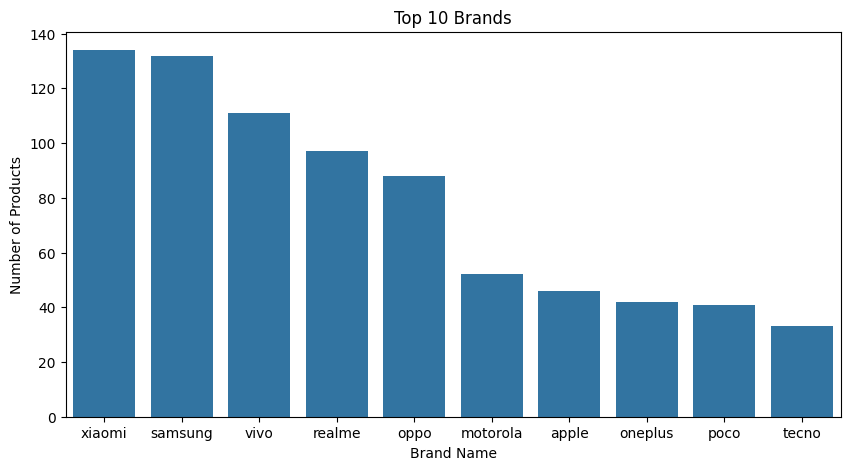

In [43]:
top_brands = df['brand_name'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x = top_brands.index, y = top_brands.values)
plt.title('Top 10 Brands')
plt.xlabel('Brand Name')
plt.ylabel('Number of Products')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11072\648489213.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='brand_name', y='price', hue='has_5g', data=df_top, ci=None)


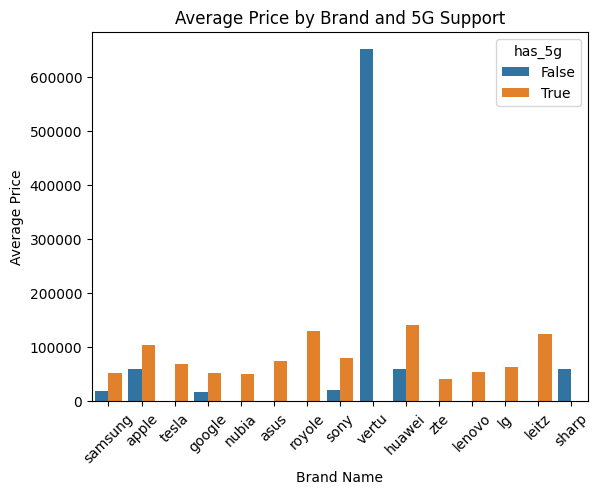

In [84]:
avg_price = df.groupby('brand_name')['price'].mean().sort_values(ascending=False)
top_avg = avg_price.head(15)
# Get top 15 brands by avg price
top_brands = top_avg.index

# Filter full DataFrame
df_top = df[df['brand_name'].isin(top_brands)]

# Plot average price with hue
sns.barplot(x='brand_name', y='price', hue='has_5g', data=df_top, ci=None)
plt.xticks(rotation=45)
plt.title('Average Price by Brand and 5G Support')
plt.xlabel('Brand Name')
plt.ylabel('Average Price')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11072\231136030.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


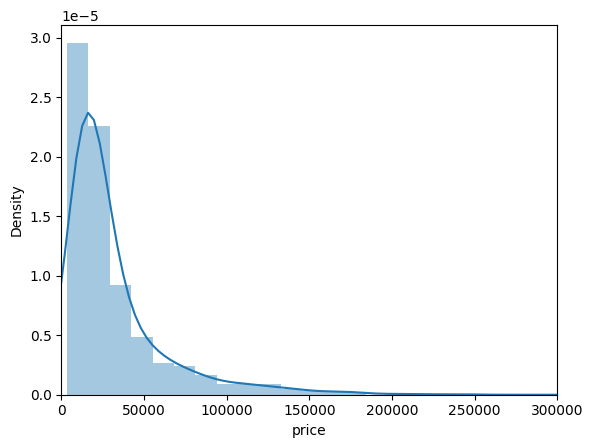

In [72]:
sns.distplot(df['price'])
plt.xlim(0, 300000)
plt.show()

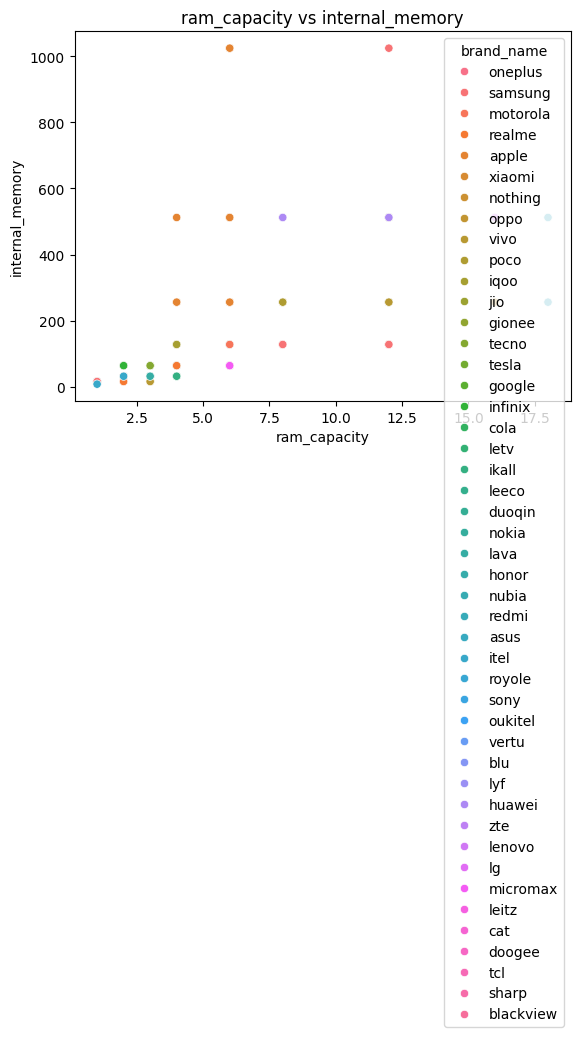

In [57]:
sns.scatterplot(x='ram_capacity', y='internal_memory', hue='brand_name', data=df)
plt.xlabel('ram_capacity')
plt.ylabel('internal_memory')
plt.title('ram_capacity vs internal_memory')
plt.show()

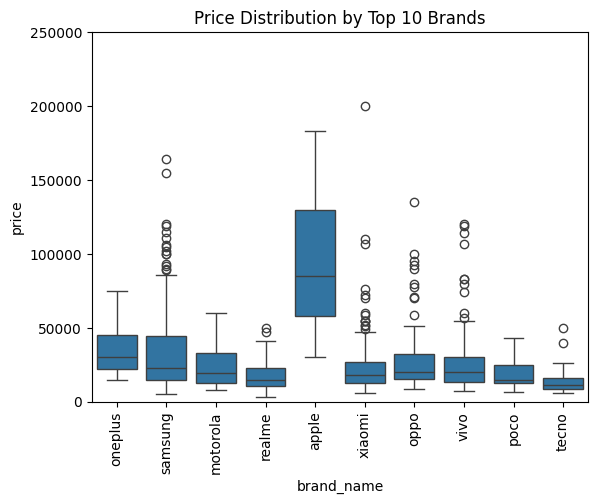

In [69]:
# Step 1: Get top 10 brands by frequency
top_brands = df['brand_name'].value_counts().head(10).index

# Step 2: Filter original dataframe for only these brands
df_top = df[df['brand_name'].isin(top_brands)]

# Step 3: Plot boxplot
sns.boxplot(x='brand_name', y='price', data=df_top)
plt.xticks(rotation=90)
plt.ylim(0, 250000)
plt.title('Price Distribution by Top 10 Brands')
plt.show()

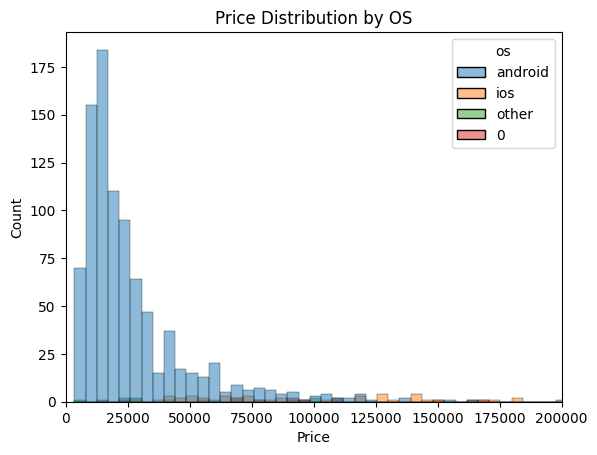

In [65]:

sns.histplot(x="price", data=df, hue="os")
plt.xlim(0, 200000)
plt.xlabel("Price")
plt.title("Price Distribution by OS")
plt.show()

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


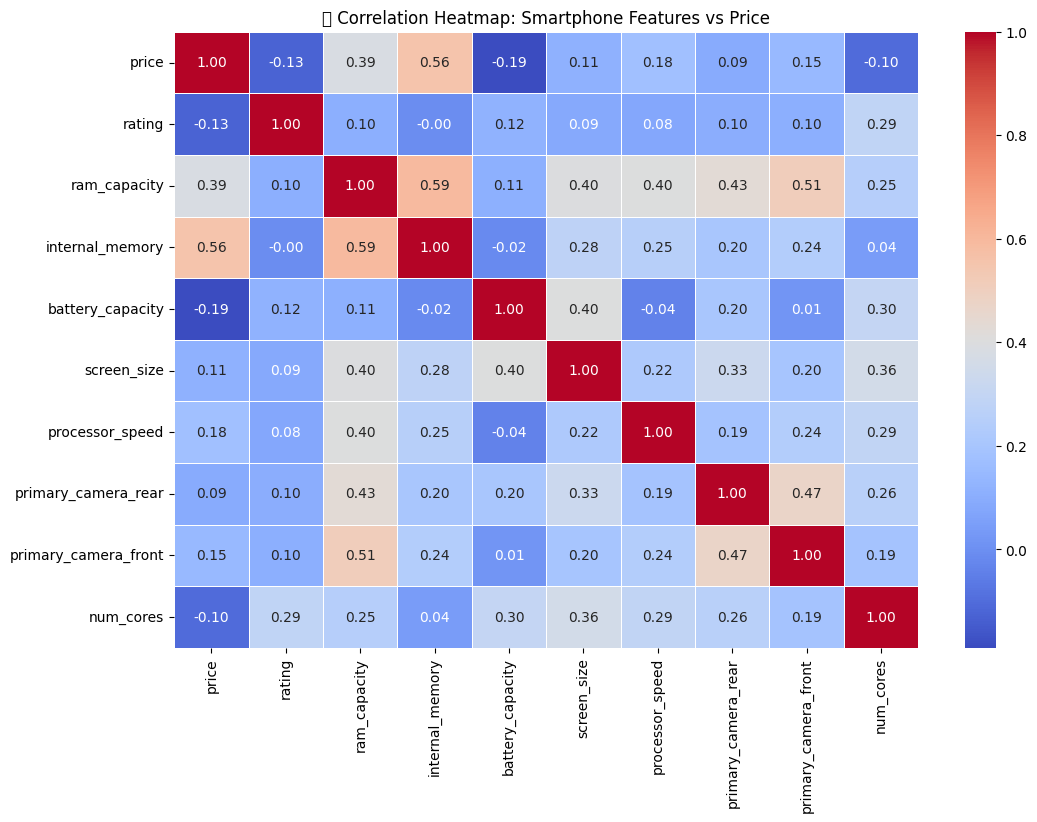

In [70]:

# Select relevant numeric features
numeric_cols = df[[
    'price', 'rating', 'ram_capacity', 'internal_memory',
    'battery_capacity', 'screen_size', 'processor_speed',
    'primary_camera_rear', 'primary_camera_front', 'num_cores'
]]

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("📈 Correlation Heatmap: Smartphone Features vs Price")
plt.show()


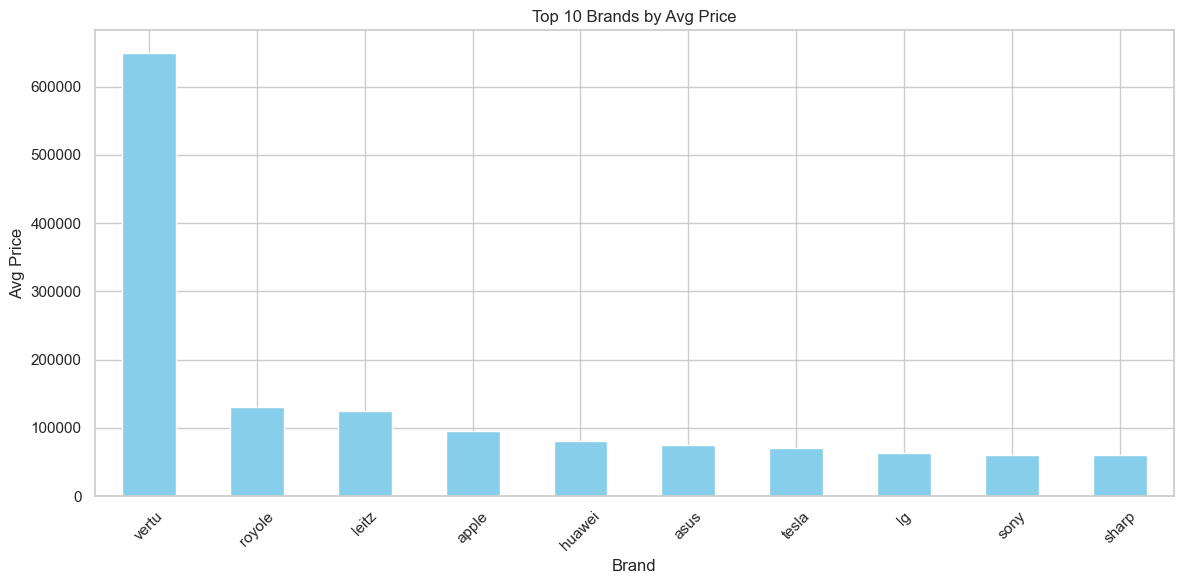

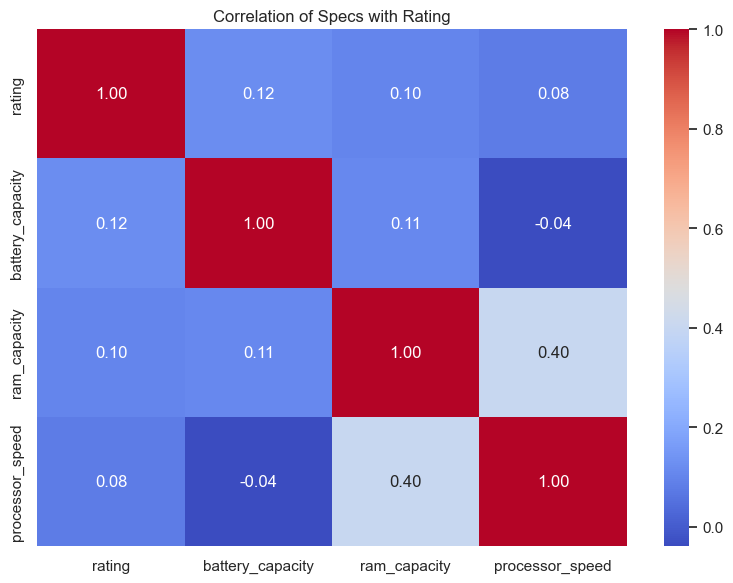

<Figure size 640x480 with 0 Axes>

In [86]:


# Fix column formats
df.replace({"TRUE": True, "FALSE": False}, inplace=True)
df['fast_charging_available'] = df['fast_charging_available'].astype(bool)

# Set plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))


### . Top Brands by Average Price
avg_price = df.groupby('brand_name')['price'].mean().sort_values(ascending=False).head(10)
avg_price.plot(kind='bar', color='skyblue', title='Top 10 Brands by Avg Price')
plt.xlabel('Brand')
plt.ylabel('Avg Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### . Rating vs Specs
specs_corr = df[['rating', 'battery_capacity', 'ram_capacity', 'processor_speed']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(specs_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Specs with Rating')
plt.tight_layout()
plt.show()



plt.tight_layout()
plt.show()

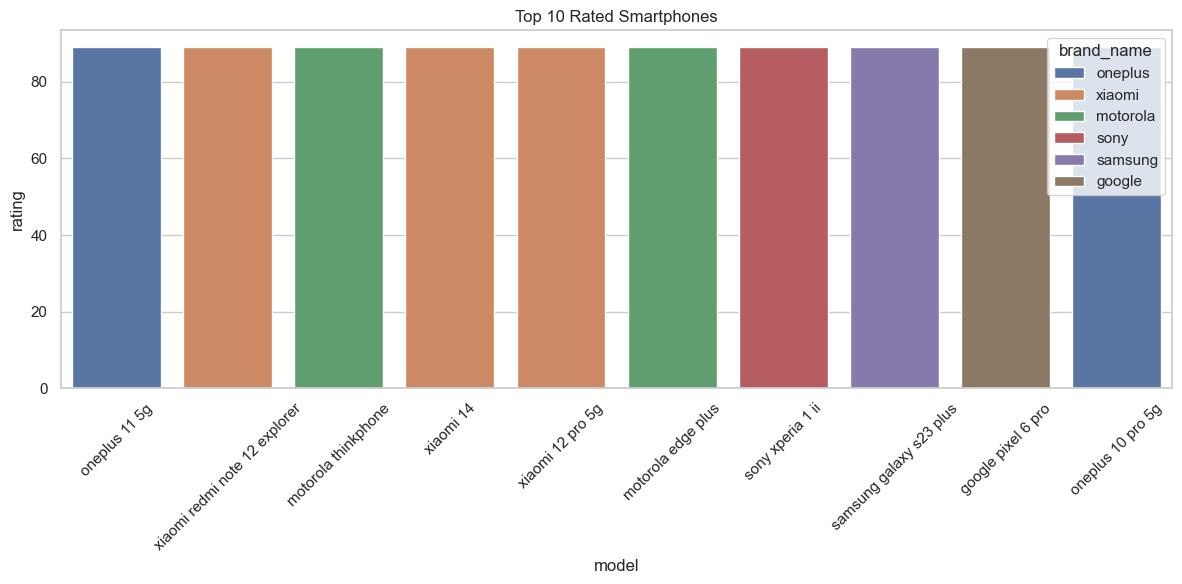

In [87]:
### . Top 10 Phones by Rating
top_rated = df.sort_values(by='rating', ascending=False).dropna(subset=['rating']).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='model', y='rating', data=top_rated, hue='brand_name')
plt.xticks(rotation=45)
plt.title('Top 10 Rated Smartphones')
plt.tight_layout()
plt.show()



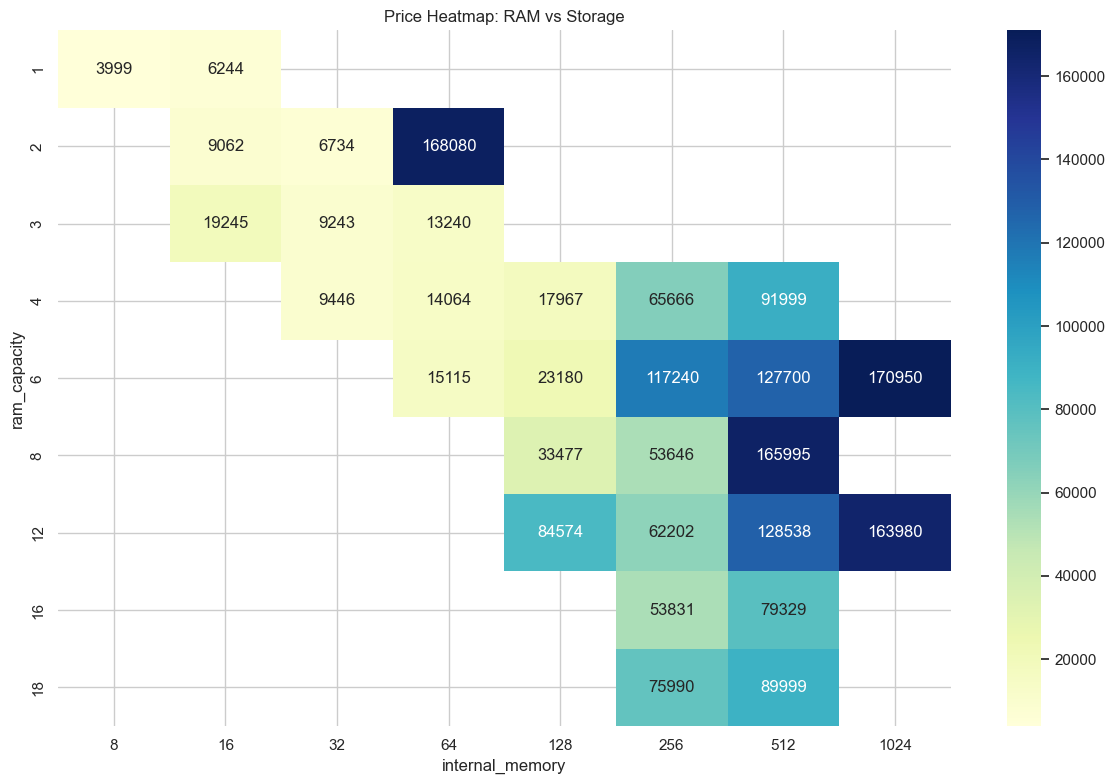

In [88]:
### . RAM & Storage vs Price (heatmap)
pivot_price = df.pivot_table(values='price', index='ram_capacity', columns='internal_memory', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_price, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Price Heatmap: RAM vs Storage')
plt.tight_layout()
plt.show()


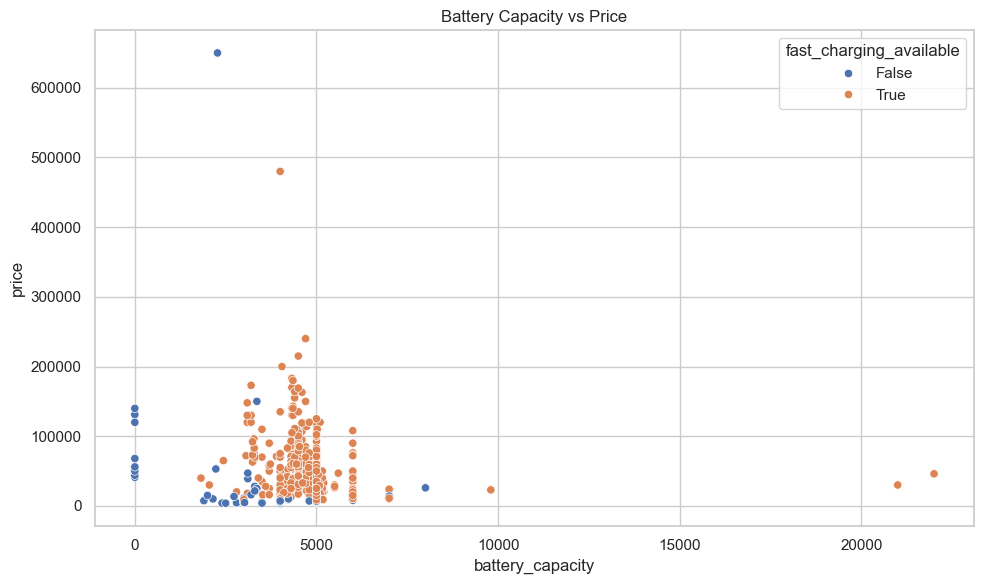

In [89]:
### . Battery vs Price (with fast charging hue)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='battery_capacity', y='price', hue='fast_charging_available', data=df)
plt.title('Battery Capacity vs Price')
plt.tight_layout()
plt.show()

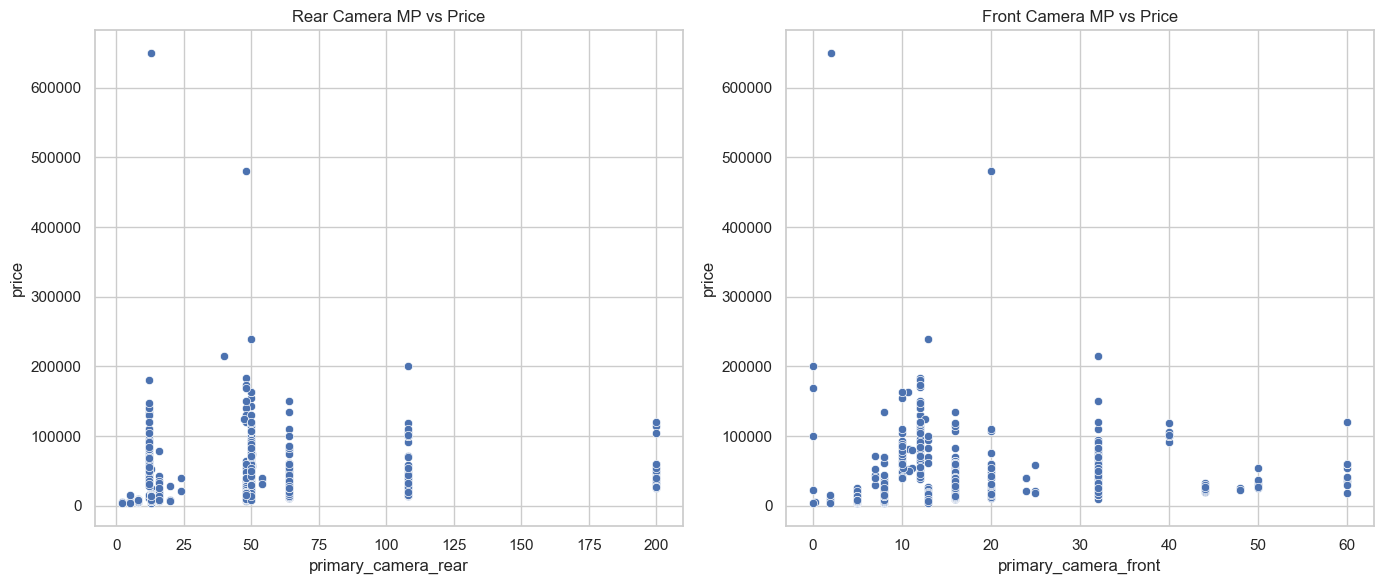

In [90]:

### . Rear & Front Camera vs Price
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(x='primary_camera_rear', y='price', data=df, ax=axes[0])
axes[0].set_title('Rear Camera MP vs Price')

sns.scatterplot(x='primary_camera_front', y='price', data=df, ax=axes[1])
axes[1].set_title('Front Camera MP vs Price')
plt.tight_layout()
plt.show()


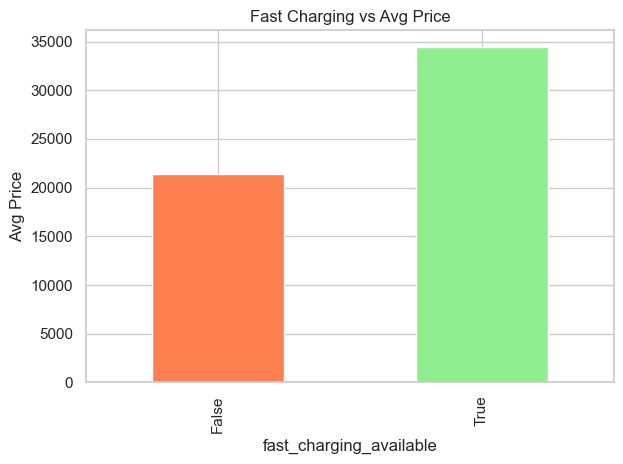

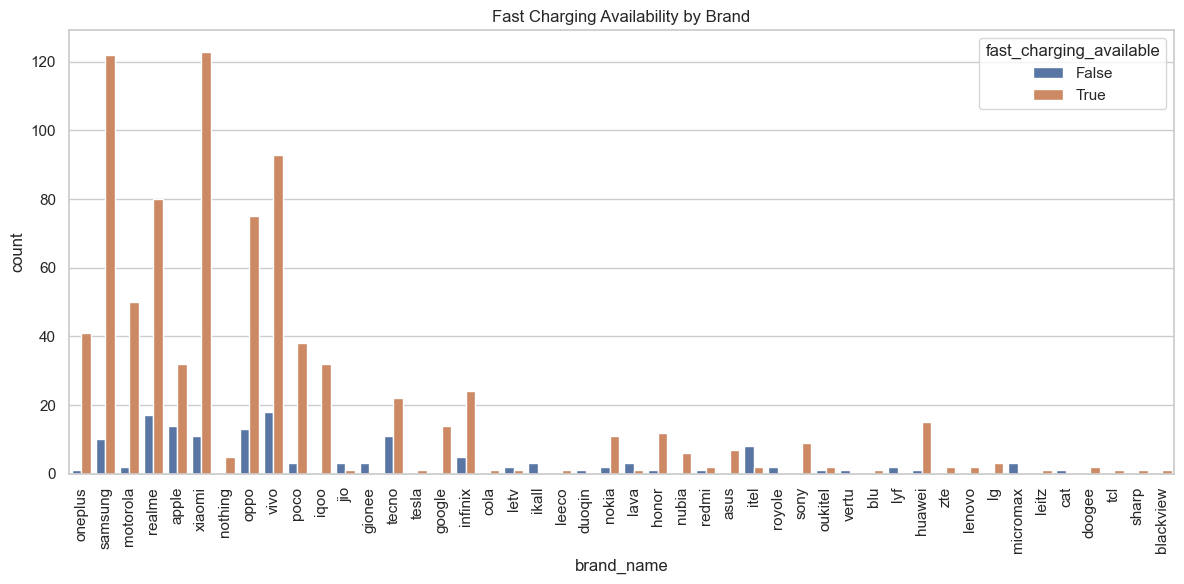

In [91]:

### . Fast Charging Impact
fast_charge_price = df.groupby('fast_charging_available')['price'].mean()
fast_charge_price.plot(kind='bar', title='Fast Charging vs Avg Price', color=['coral', 'lightgreen'])
plt.ylabel('Avg Price')
plt.tight_layout()
plt.show()

# Count by brand & fast charging
plt.figure(figsize=(12, 6))
sns.countplot(x='brand_name', hue='fast_charging_available', data=df)
plt.xticks(rotation=90)
plt.title('Fast Charging Availability by Brand')
plt.tight_layout()
plt.show()


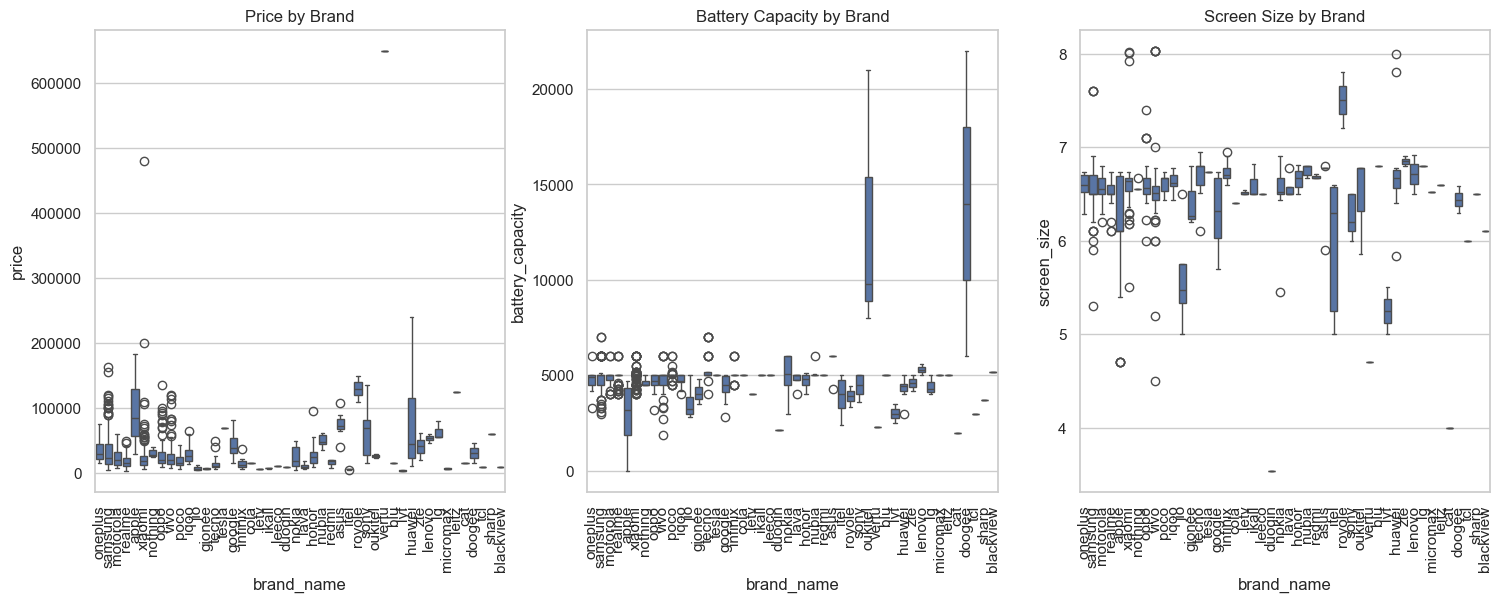

In [92]:

### . Brand-Wise Feature Distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='brand_name', y='price', data=df, ax=axes[0])
axes[0].set_title('Price by Brand')

sns.boxplot(x='brand_name', y='battery_capacity', data=df, ax=axes[1])
axes[1].set_title('Battery Capacity by Brand')

sns.boxplot(x='brand_name', y='screen_size', data=df, ax=axes[2])
axes[2].set_title('Screen Size by Brand')

for ax in axes:
    ax.tick_params(axis='x', rotation=90)

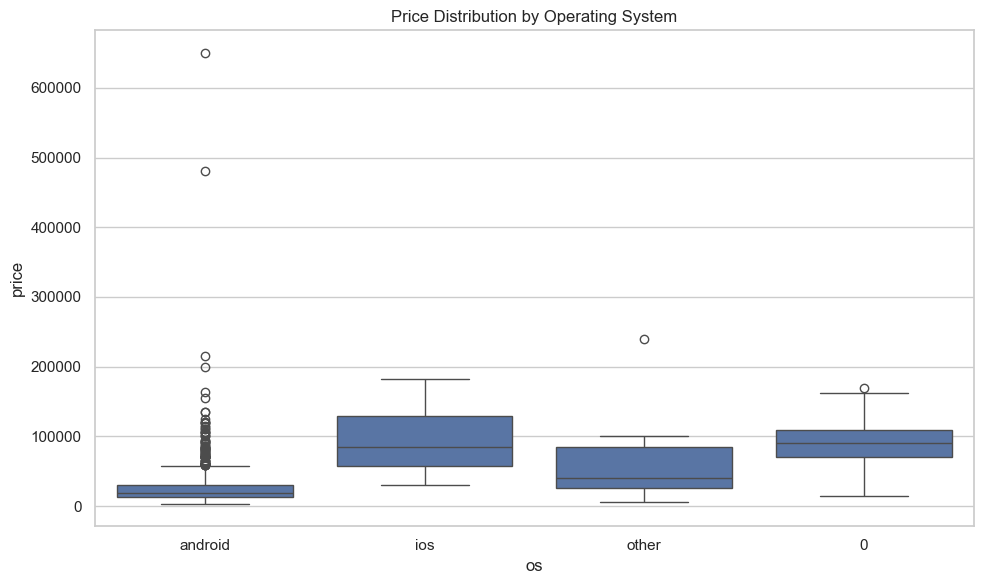

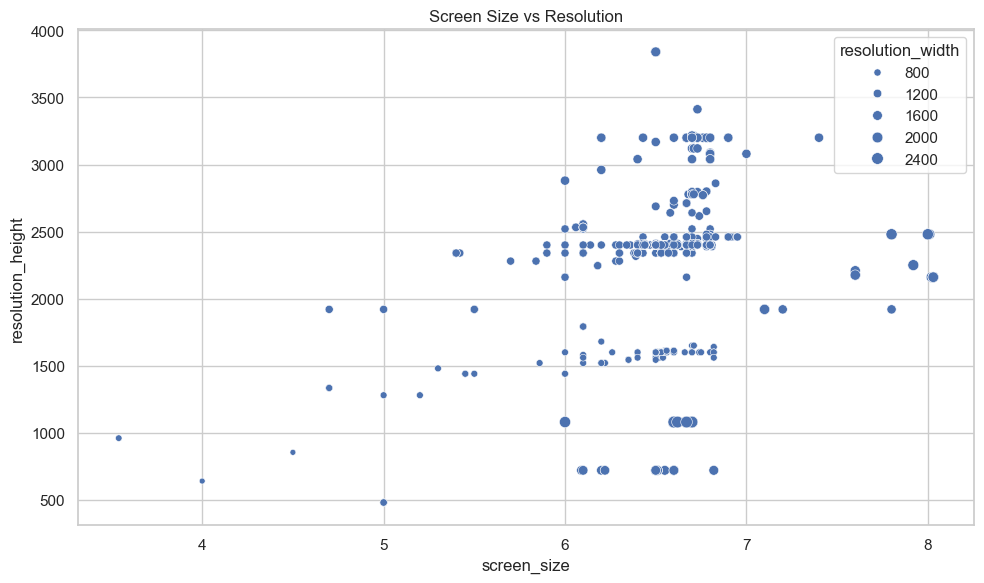

In [93]:
### . Price Distribution by OS
plt.figure(figsize=(10, 6))
sns.boxplot(x='os', y='price', data=df)
plt.title('Price Distribution by Operating System')
plt.tight_layout()
plt.show()



### . Screen Size vs Resolution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='screen_size', y='resolution_height', size='resolution_width', data=df)
plt.title('Screen Size vs Resolution')
plt.tight_layout()
plt.show()